<a href="https://colab.research.google.com/github/priyanshgupta1998/Machine_learning/blob/master/Algorithms/KMeans_Detail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [17]:
# create a dataset that consist some random data points 

df =pd.DataFrame({
	'x' :[12,20,20,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
	'y' :[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
	})

print(df.shape)
df.head()

(19, 2)


,x,y
0,12,39
1,20,36
2,20,30
3,18,52
4,29,54


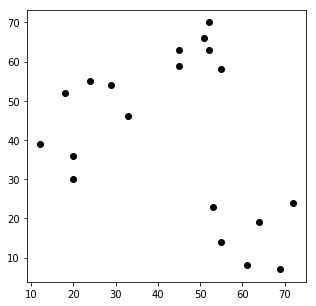

In [18]:
#Draw a scatter plot of all the datapoints that are available in the dataset
plt.figure(figsize =(5,5))
plt.scatter(df['x'] ,df['y'] , color='k')
plt.show()

In [19]:
np.random.seed(200)     #The prupose of using this ....value doesn't changed which has been taken randomly
k = 3
centroids = {
	i+1: [np.random.randint(0 , 80) , np.random.randint(0,80)]
	for i in range(k)
}
centroids


{1: [26, 16], 2: [68, 42], 3: [55, 76]}

In [20]:
for i in centroids.keys():
  print(centroids[i] , '      ----       ' ,    *centroids[i])

[26, 16]       ----        26 16
[68, 42]       ----        68 42
[55, 76]       ----        55 76


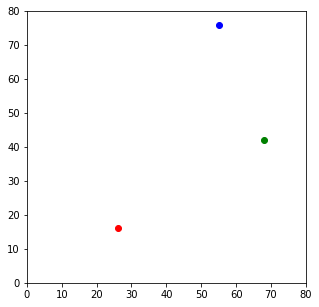

In [21]:
plt.figure(figsize =(5,5))
#plt.scatter(df['x'] ,df['y'] , color='k')
colmap = {1 : 'r' , 2:'g' , 3:'b'}
for i in centroids.keys():
	plt.scatter(*centroids[i] , color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()



## Putting it all together

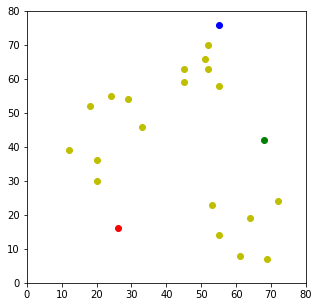

In [22]:
plt.figure(figsize =(5,5))
plt.scatter(df['x'] ,df['y'] , color='y')
colmap = {1 : 'r' , 2:'g' , 3:'b'}
for i in centroids.keys():
	plt.scatter(*centroids[i] , color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()



In [23]:
def assignment(df, centroids):
  for i in centroids.keys():
    #Calculate the euclidean distance between each data point tn the dataste and that  corresponding centroid
    df['distance_from_{}'.format(i)] =(
        np.sqrt(
            (df['x'] - centroids[i][0])**2
            + (df['y'] - centroids[i][1])**2
        )
    )
  centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  print(centroid_distance_cols)
  #Pandas is one of those packages and makes importing and analyzing data much easier. 
  #Pandas dataframe.idxmin() function returns index of first occurrence of minimum over requested axis.
  df['closest'] = df.loc[: , centroid_distance_cols].idxmin(axis = 1)   # just see the example below in this notebook at the end.
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color'] = df['closest'].map(lambda x: colmap[x])
  return df

    

df= assignment(df, centroids)

['distance_from_1', 'distance_from_2', 'distance_from_3']


In [24]:
data = df.copy()
data.head()

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,26.925824,56.080300,56.727418,1,r
1,20,36,20.880613,48.373546,53.150729,1,r
2,20,30,15.231546,49.477268,57.801384,1,r
3,18,52,36.878178,50.990195,44.102154,1,r
4,29,54,38.118237,40.804412,34.058773,3,b


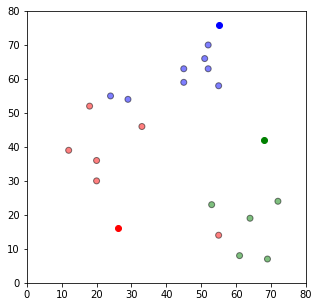

In [25]:
plt.figure(figsize =(5,5))
plt.scatter(data['x'] ,data['y'] , color=data['color'] , alpha=0.5 , edgecolor ='k')
for i in centroids.keys():
	plt.scatter(*centroids[i] , color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()


# Now move on to the updated stage

In [26]:

import copy
old_centroids = copy.deepcopy(centroids)
print(type(old_centroids))
old_centroids 

<class 'dict'>


{1: [26, 16], 2: [68, 42], 3: [55, 76]}

In [27]:
df = data.copy()
print(df.shape)
df.head()

(19, 7)


,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,26.925824,56.080300,56.727418,1,r
1,20,36,20.880613,48.373546,53.150729,1,r
2,20,30,15.231546,49.477268,57.801384,1,r
3,18,52,36.878178,50.990195,44.102154,1,r
4,29,54,38.118237,40.804412,34.058773,3,b


In [28]:
#Now calculate the mean of the elements from each cluster and the most acurate data point (accurate centroid of that cluster)
def updates(k):
	for i in centroids.keys():
		k[i][0] = np.mean(df[df['closest'] == i]['x'])
		k[i][1] = np.mean(df[df['closest'] == i]['y'])
	return k

new_centroids = updates(centroids)
new_centroids

{1: [26.333333333333332, 36.166666666666664],
 2: [63.8, 16.2],
 3: [44.125, 61.0]}

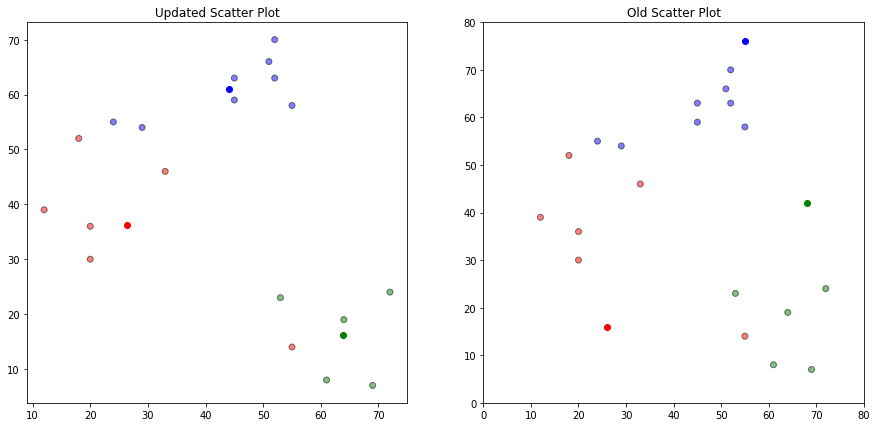

In [29]:
plt.figure(figsize=(15,7))

plt.subplot(121)
plt.scatter(df['x'] , df['y'] , color=df['color'] , alpha=0.5 , edgecolor='k')
for i in new_centroids.keys():
	plt.scatter(*new_centroids[i] , color = colmap[i])
plt.title('Updated Scatter Plot')

plt.subplot(122)
plt.scatter(df['x'] , df['y'] , color=df['color'] , alpha=0.5 , edgecolor='k')
for i in old_centroids.keys():
	plt.scatter(*old_centroids[i] , color = colmap[i])
plt.title('Old Scatter Plot')
  
  
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

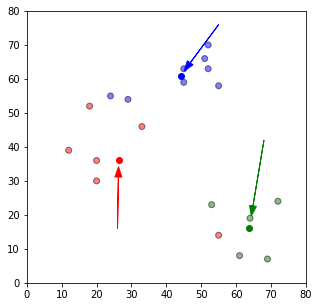

In [30]:
#Measurement of the movement of the centroids in every cluster
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'] , df['y'] , color=df['color'] , alpha=0.5 , edgecolor='k')
for i in new_centroids.keys():
	plt.scatter(*new_centroids[i] , color = colmap[i])

plt.xlim(0,80)
plt.ylim(0,80)
for i in old_centroids.keys():
	old_x = old_centroids[i][0]
	old_y = old_centroids[i][1]
	dx = (centroids[i][0] - old_centroids[i][0])*0.75
	dy = (centroids[i][1] - old_centroids[i][1])*0.75
	ax.arrow(old_x , old_y , dx,dy , head_width =2 , head_length =3 , fc =colmap[i] , ec=colmap[i])
plt.show()

### Now come to the best optimal solution Or get the most accurate centroid in each cluster.

['distance_from_1', 'distance_from_2', 'distance_from_3']
['distance_from_1', 'distance_from_2', 'distance_from_3']
['distance_from_1', 'distance_from_2', 'distance_from_3']


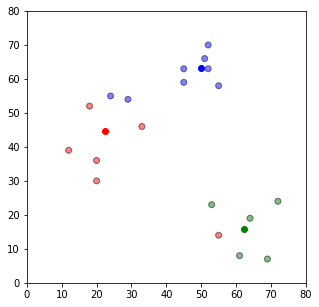

In [31]:
#This process will continue until we get same mean in both continuous step
while(True):
  closest_centroids = df['closest'].copy(deep =True)
  centroids = updates(centroids)   #Update the centroid point
  df = assignment(df,centroids)    # Repeat the same process again such as calculate the new_closest_value and their corresponding color .
  if closest_centroids.equals(df['closest']):   #Check if we are getting exact cluster same as previous by checking their Closest value.
    break

plt.figure(figsize =(5,5))
plt.scatter(data['x'] ,data['y'] , color=data['color'] , alpha=0.5 , edgecolor ='k')
for i in centroids.keys():
	plt.scatter(*centroids[i] , color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

From the above graph we can see that we are getting best optimal answer after 3 steps .
Most accurate centroid point

In [32]:
print(centroids) #-------(1)    #Best optimal or accurate Centroid points which using Machine learning Algorithm

{1: [22.285714285714285, 44.57142857142857], 2: [62.333333333333336, 15.833333333333334], 3: [50.0, 63.166666666666664]}


### It's time to bring Machine learnig inbluit K-means Algorithm (from Scikit-learn) into Picture.

In [10]:
df =pd.DataFrame({
	'x' :[12,20,20,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
	'y' :[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
	})

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3)
kmeans.fit(df)  # it will generate label automatically  # These labels are nothing but the classes. each class represents an single centroid.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
labels = kmeans.predict(df)
print(labels)

[2 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0]


In [34]:
centroids = kmeans.cluster_centers_
centroids #------(2)   # Getting the most accurate centroid using Kmeans(Machine learning Algorithm) .it is same as centroid which we got wthout using Kmeans

array([[62.33333333, 15.83333333],
       [50.        , 63.16666667],
       [22.28571429, 44.57142857]])

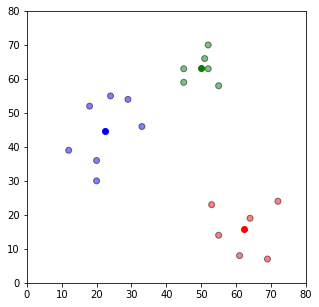

In [35]:

fig = plt.figure(figsize=(5,5))
colors = list(map(lambda x: colmap[x+1] , labels))
plt.scatter(df['x'] , df['y'] ,  color= colors , alpha = 0.5 , edgecolor = 'k')

for idx,centroid in enumerate(centroids):
	plt.scatter(*centroid , color=colmap[idx+1])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()


#Other Activity

#Pandas idxmin() function 
`Pandas dataframe.idxmin() function returns index of first occurrence of minimum over requested axis. While finding the index of the minimum value across any index, all NA/null values are excluded.`

>> Syntax: DataFrame.idxmin(axis=0, skipna=True)

In [0]:
import pandas as pd  
df = pd.DataFrame({
                   "A":[4, 5, 2, 6], 
                   "B":[11, 2, 5, 8], 
                   "C":[1, 8, 66, 4]
                  })
df

,A,B,C
0,4,11,1
1,5,2,8
2,2,5,66
3,6,8,4


In [0]:
df.idxmin(axis = 0) 

A    2
B    1
C    0
dtype: int64

In [0]:
df.idxmin(axis = 1)  #when it comes to column axis then it returns correspponding column_name instead of returning of index of most minimum value in the axis.

0    C
1    B
2    A
3    C
dtype: object

In [0]:
df = pd.DataFrame({"A":[4, 5, 2, None],  
                   "B":[11, 2, None, 8],  
                   "C":[1, 8, 66, 4]}) 
  
# Skipna = True will skip all the Na values 
df.idxmin(axis = 1, skipna = True) 

0    C
1    B
2    A
3    C
dtype: object